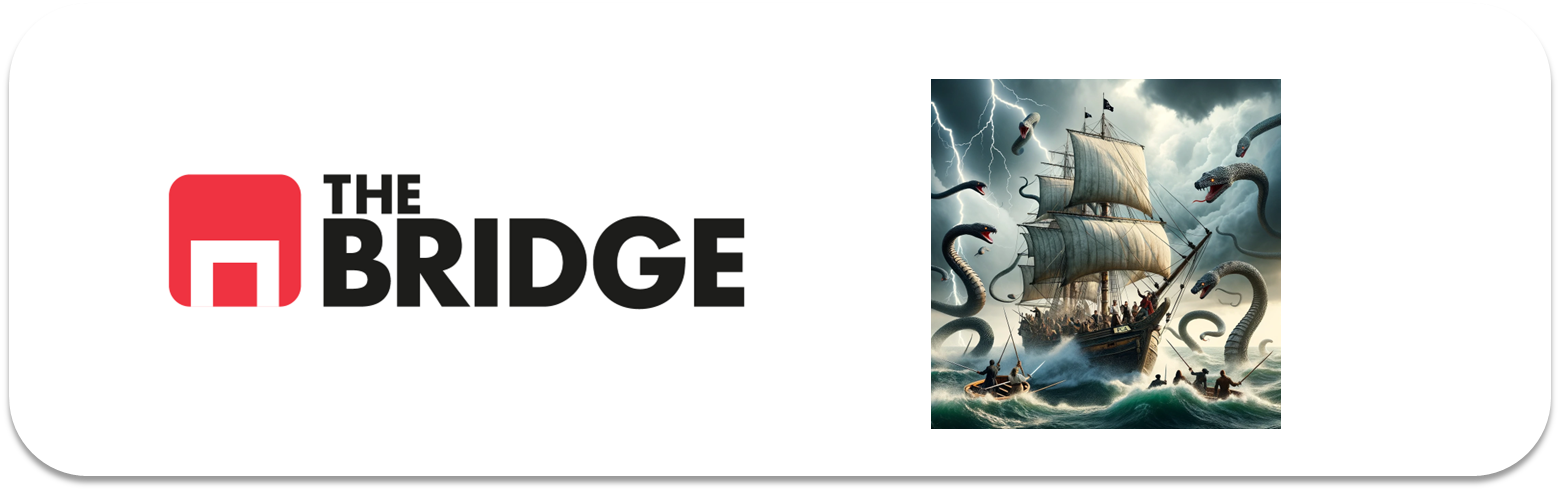

## PCA (III): Otras aplicaciones

### PARTE I: Visualización de relaciones: Clustering, Prediccion

En esta primera parte vamos a ver muy brevemente y a título ilustrativo como usar la PCA para visualizar los dataset de una forma alternativa que puede servirnos para clusterizar o para comprobar la capacidad predictiva de las componentes en un dataset relativamente complejo.

Primero un poco de "teoría" que nos va a servir en ambos ejemplos:

Un imagen digital típica se compone apilando matrices de píxeles Rojos, Azules y Verdes con intensidades que van de 0 a 255.

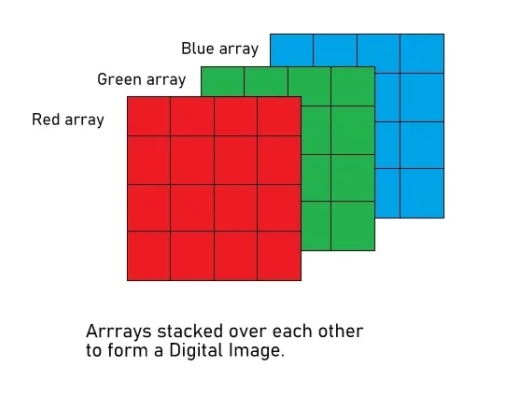

Una imagen en escala de grises no contiene color, sino solo tonos de gris. La intensidad del píxel en una imagen en escala de grises varía desde el negro (intensidad 0) hasta el blanco (intensidad completa 255) para hacer lo que normalmente llamamos una imagen en blanco y negro.

### Dataset

El conjunto de datos Digits es un conjunto de imágenes en escala de grises de dígitos escritos a mano que contiene 1797 imágenes de 8×8 y que vamos a emplear ahora:

In [1]:
#importing the dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
 
digits = load_digits()
data = digits.data
data.shape

(1797, 64)

La forma de los datos del `digits` dataset es (1797, 64). Es decir 1797 instancias con 64 features (los 8×8 píxeles que se aplanan para crear un vector de longitud 64 para cada imagen). Ya es un número razonable para pensar en una posible PCA si las condiciones se dan (explicabilidad, reducción aceptable de precisión o de información, etc).  

Podemos visualizar algunas instancias empleando `imshow` de pyplot con los datos debidamente "reshapeados" a 8x8:


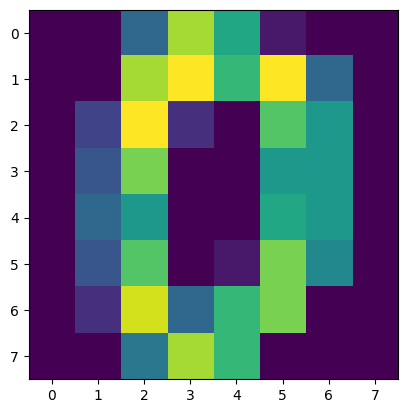

In [2]:
#taking a sample image to view
#Remember image is in the form of numpy array.
image_sample = data[0,:].reshape(8,8)
plt.imshow(image_sample);

Ahora, utilizando PCA, reduzcamos las dimensiones de la imagen de 64 a solo 2 para que podamos visualizar el conjunto de datos usando un Scatterplot y solo las dos primeras componentes. Fijate en la forma de hacerlo, instanciamos la PCA con el número de componentes que queremos quedarnos, también podríamos haber puesto un valor entre 0 y 1 y se hubiera quedado con las componentes que aseguran un ratio acumulado de varianza igual o superior a ese valor entre 0 y 1:

In [3]:
#Import required modules
from sklearn.decomposition import PCA
 
pca = PCA(2) # fíjate en la forma de instanciar la PCA
converted_data = pca.fit_transform(digits.data)
 
converted_data.shape

(1797, 2)

Y ahora podemos visualizar el conjunto de datos haciendo un scatter de las dos componentes que mayor varianza conservan y colorearlo según el target (en este caso, el número que representa cada instanica de `digits`)

/tmp/ipykernel_2695046/426504105.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
/tmp/ipykernel_2695046/426504105.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c_map = plt.cm.get_cmap('jet', 10)


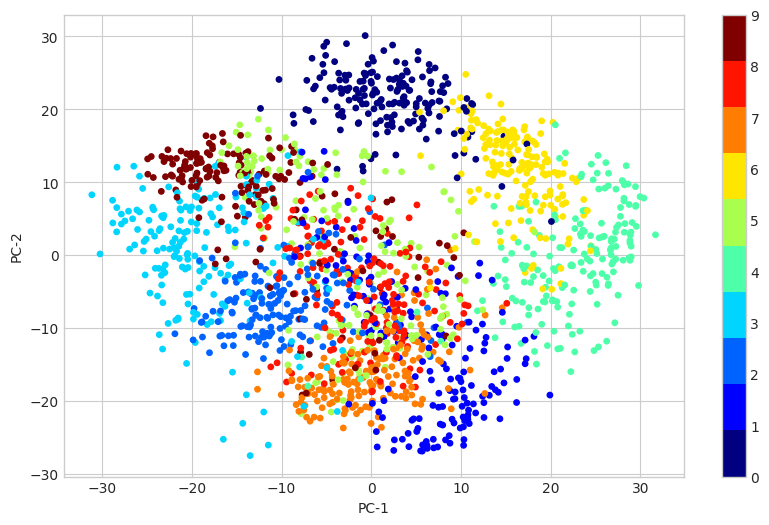

In [4]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(converted_data[:, 0],
            converted_data[:, 1],
            s = 15,
            cmap = c_map ,
            c = digits.target)

plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

En este caso lo que podemos ver es como las dos primeras componentes ya de por sí tienen bastante capacidad discriminativa para algunos de los digitos (observa la separación del "0", o del "6", o el cluster de puntos del "1").

Esta misma aproximación nos puede servir para intentar visualizar datasets complejos de una forma reducida acudiendo a sus dos componentes principales o a una tercera que marque el color o una cuarta el tamaño de los puntos... etc,etc lo que además puede servirnos para detectar posibles agrupaciones o clusters.  



***

### Parte II: Compresión de imágenes

Otra aplicación interesante de PCA se encuentra en la compresión de imágenes. Echemos un vistazo a cómo podemos lograr esto con python.

In [5]:
# Importing required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Vamos a cargar la imagen de un lindo "perrete" y la vamos a comprimir. Primero cargamos:

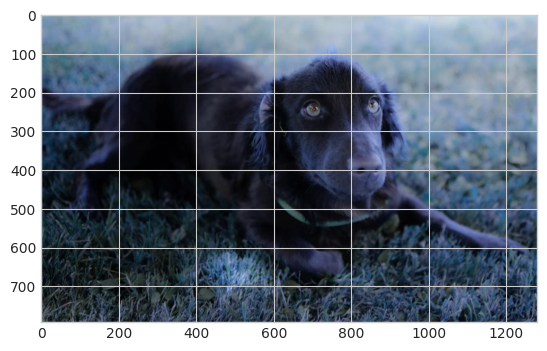

In [6]:
# Loading the image 
'''
openCV carga las imágenes en escala BGR pero imshow de pyplot las interpreta como si fueran RGB por lo que adquieren un tono azulado como vas a comprobar
'''
img = cv2.imread('img/my_doggo_sample.jpeg') #you can use any image you want.
plt.imshow(img);

Podemos cambiarlo para que veas la imagen como originalmente es:

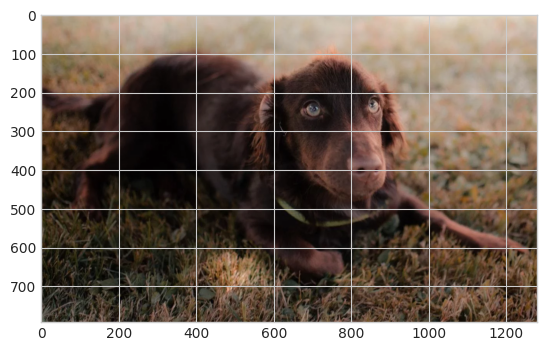

In [7]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

Seguimos trabajando con la versión BGR, sin razón particular para hacerlo :-):

In [8]:
# Separamos los canales en tres "datasets" ahora de un único valor. Separando en Azul, Verde y Rojo
 
blue, green, red = cv2.split(img) 


In [9]:
print(blue.shape) # Se ha convertido en un array con la altura en pixels, la anchura en pixels y un único valor el del azul para cada uno de los píxeles de la imagen. 

(793, 1280)


Visto como un dataset cada canal son 793 instancias con 1280 features.

Está división en canales Azul, Verde y Rojo en lugar de Rojo, Azul y Verde hay que tenera en cuenta para no meter la pata. Vamos a aplicar la PCA para quedarnos con las 20 componentes principales de esas 1280 features. Es decir vamos a reducir linea a linea de la imagen los 1280 pixeles en 20 (x3 canales). Claro esto no se podrá ver tal cual, luego tendremos que descomprimir y ver el resultado.   

Hagamos la PCA de cada canal y luego usemos inverse_transform para obtener cada canal descomprimido:

In [10]:
# Initialize PCA with first 20 principal components
pca = PCA(20)
 
#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
print('red_transformed.shape:', red_transformed.shape)
red_inverted = pca.inverse_transform(red_transformed)
print('red_inverted.shape:', red_inverted.shape)
 
#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
print('green_transformed.shape:', green_transformed.shape)
green_inverted = pca.inverse_transform(green_transformed)
print('green_inverted.shape:', green_inverted.shape)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
print('blue_transformed.shape:', blue_transformed.shape)
blue_inverted = pca.inverse_transform(blue_transformed)
print('blue_inverted.shape:', blue_inverted.shape)

red_transformed.shape: (793, 20)
red_inverted.shape: (793, 1280)
green_transformed.shape: (793, 20)
green_inverted.shape: (793, 1280)
blue_transformed.shape: (793, 20)
blue_inverted.shape: (793, 1280)


NOTA: Separar por canal es porque no podemos hacer la PCA de features que sean vectores, recuerda que una imagen la puedes ver como una matriz de 2dimensiones con tantas filas como pixels tenga de alto, tantas columnas como pixels tenga de ancho y cada valor de la matriz un vector de 3 dimensiones (una por cada canal de color) o bien como una tabla de tantas filas como pixeles tenga de alto, tantas features como pixels de ancho y que cada feature sea un vector. Esto último no lo admite la PCA por eso la hacemos canal por canal y luego juntamos los canales

Hemos pasado de tener $793*1280*3$ puntos a tener $3*793*20$ puntos:

In [11]:
tam_inicial = img.size
tam_inicial

3045120

In [12]:
tam_compressed = red_transformed.size + blue_transformed.size + green_transformed.size
tam_compressed

47580

In [13]:
print(f"factor de comprension: {(1 - tam_compressed/tam_inicial)*100.0}%")

factor de comprension: 98.4375%


Impresionante, pero veamos si la calidad de la reconstrucción merece la pena.

Mezclamos o juntamos los canales para reconstruir las imágenes. Tiramos un poco de numpy y de cuando veíamos concatenaciones en este caso ailamos los arrays de cada canal usando la función dstack. Aquí es importante especificar el tipo de datos de nuestros arrays, ya que la mayoría de las imágenes son de 8 bits. Cada píxel está representado por un byte de 8 bits.:

In [14]:
# dstack: Stack arrays in sequence depth wise (along third axis).
img_not_compressed = (np.dstack((blue, green, red))).astype(np.uint8)

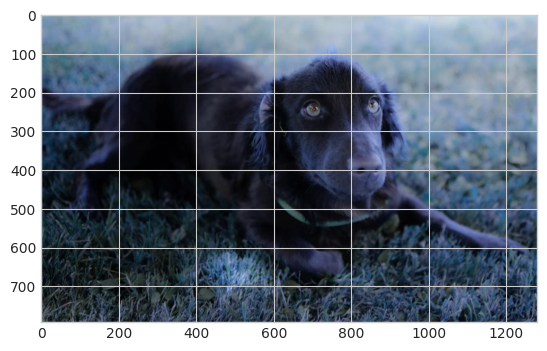

In [15]:
# Viewing the not compressed image
plt.imshow(img_not_compressed);

No te emociones, que esta es la imagen origina (fijate que hemos reconstruido a partir de los canales previamente separados). Veamos la comprimida, aplicando la misma apilación o concatenación de arrays con dstack:

In [16]:
img_compressed = (np.dstack((blue_inverted, green_inverted, red_inverted))).astype(np.uint8)

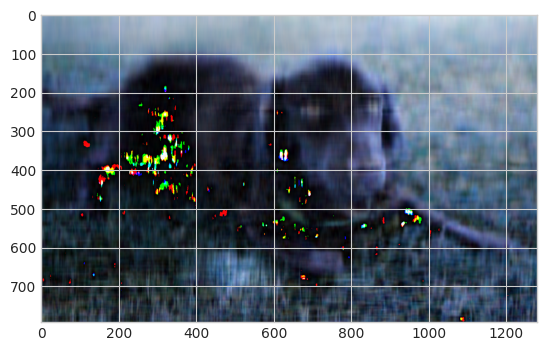

In [17]:
# Viewing the compressed image
plt.imshow(img_compressed);

El resultado anterior es lo que obtenemos al considerar solo 20 componentes principales y aunque de lejos igual cuela salvo por los puntos esos de colores, se ve que el perrete se ha puesto triste podemos jugar a reducir el factor de compresión (quedándonos con más componentes) hasta llegar a un nivel aceptable:


Probemos con 60 y con 120:

In [18]:
# Let's try with 60 PCs
pca = PCA(60)
 
#Applying to red channel and then applying inverse transform to transformed array.
r_transformed = pca.fit_transform(red)
print('red_transformed.shape:', r_transformed.shape)
r_inverted = pca.inverse_transform(r_transformed)
print('red_inverted.shape:', red_inverted.shape)
 
#Applying to Green channel and then applying inverse transform to transformed array.
g_transformed = pca.fit_transform(green)
print('green_transformed.shape:', g_transformed.shape)
g_inverted = pca.inverse_transform(g_transformed)
print('green_inverted.shape:', green_inverted.shape)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
b_transformed = pca.fit_transform(blue)
print('blue_transformed.shape:', b_transformed.shape)
b_inverted = pca.inverse_transform(b_transformed)
print('blue_inverted.shape:', blue_inverted.shape)

red_transformed.shape: (793, 60)
red_inverted.shape: (793, 1280)
green_transformed.shape: (793, 60)
green_inverted.shape: (793, 1280)
blue_transformed.shape: (793, 60)
blue_inverted.shape: (793, 1280)


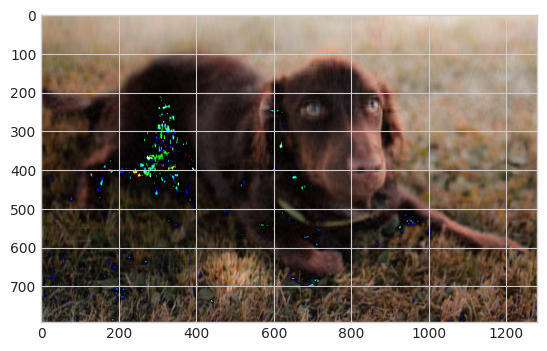

In [19]:
img_compressed_v2 = (np.dstack((r_inverted, g_inverted, b_inverted))).astype(np.uint8)
plt.imshow(img_compressed_v2);

Algo mejor el perro, pero esos puntos verdorsos... Aún así el factore es:

In [20]:
1 - 60/1280

0.953125

De un 95%

Podemos darle la vuelta, probemos para un factor de compresión del 80% (es decir nos quedamos con el 20% de las 1280 features, pixels, por canal):

In [21]:
# Let's try with 60 PCs
pca = PCA(int(1280*0.2))
 
#Applying to red channel and then applying inverse transform to transformed array.
r_transformed = pca.fit_transform(red)
print('red_transformed.shape:', r_transformed.shape)
r_inverted = pca.inverse_transform(r_transformed)
print('red_inverted.shape:', red_inverted.shape)
 
#Applying to Green channel and then applying inverse transform to transformed array.
g_transformed = pca.fit_transform(green)
print('green_transformed.shape:', g_transformed.shape)
g_inverted = pca.inverse_transform(g_transformed)
print('green_inverted.shape:', green_inverted.shape)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
b_transformed = pca.fit_transform(blue)
print('blue_transformed.shape:', b_transformed.shape)
b_inverted = pca.inverse_transform(b_transformed)
print('blue_inverted.shape:', blue_inverted.shape)

red_transformed.shape: (793, 256)
red_inverted.shape: (793, 1280)
green_transformed.shape: (793, 256)
green_inverted.shape: (793, 1280)
blue_transformed.shape: (793, 256)
blue_inverted.shape: (793, 1280)


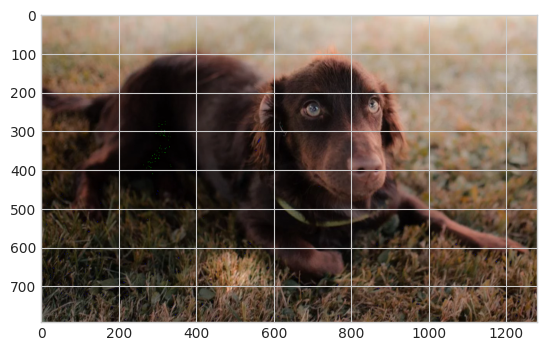

In [22]:
img_compressed_v2 = (np.dstack((r_inverted, g_inverted, b_inverted))).astype(np.uint8)
plt.imshow(img_compressed_v2);

Hmmm no está nada mal.